In [134]:
#Read in files using pandas
import pandas as pd
import numpy as np
import datetime as dt
import math
from sklearn import tree
from sklearn.model_selection import train_test_split
data = pd.read_csv('data/new_data/new_incidents2009_wHeader.csv')
data = data.dropna(axis=0)
data = data.astype('str')

In [135]:
#Data file processing
clean_data = data
clean_data['PhonePickUp'] = data['PhonePickUp'].apply(lambda x: dt.datetime.strptime(x,"%m/%d/%y %H:%M:%S"))
clean_data['Hour'] = data["PhonePickUp"].apply(lambda x: x.hour)
clean_data['Day'] = data["PhonePickUp"].apply(lambda x: x.day)
clean_data['Month'] = data["PhonePickUp"].apply(lambda x: x.month)

In [136]:
clean_data['Lat'] = data["Lat_Lon"].apply(lambda x: float(x.split("_")[0]))
clean_data['Lon'] = data["Lat_Lon"].apply(lambda x: float(x.split("_")[1]))

In [5]:
clean_data

,Call_Category,Master_Incident_Number,Jurisdiction,Problem,Lat_Lon,Street_Block,City,Postal_Code,PhonePickUp,Time_First_Staged_Arrived,Total_Response_Time,Cross_Street,Hour,Day,Month,Lat,Lon
0,Emergency Medical Response,FS09000001,San Diego,Stabbing/Gunshot (L1),32.71593_-117.13288,28TH ST/29TH ST,SAN DIEGO,92102,2009-01-01 00:05:49,1/1/09 0:08:08,0:02:19,2800 BROADWAY,0,1,1,32.71593,-117.13288
1,Emergency Medical Response,FS09000003,San Diego,Assault/Rape (L1),32.75589_-117.088,TROJAN AV/EL CAJON BL,SAN DIEGO,92115,2009-01-01 00:07:21,1/1/09 0:17:06,0:09:45,4300 WINONA AV,0,1,1,32.75589,-117.08800
2,Emergency Medical Response,FS09000002,San Diego,Unc/Fainting (Non Trauma)(L1),32.71583_-117.15195,14TH ST/15TH ST,SAN DIEGO,92101,2009-01-01 00:07:26,1/1/09 0:11:56,0:04:30,1400 BROADWAY,0,1,1,32.71583,-117.15195
3,Emergency Medical Response,FS09000004,San Diego,Falls / Back Inj (Trauma) (L1),32.79954_-117.08041,IRWIN AV/GLENROY ST,SAN DIEGO,92120,2009-01-01 00:09:55,1/1/09 0:15:59,0:06:04,5200 LEWISON AV,0,1,1,32.79954,-117.08041
4,Emergency Medical Response,FS09000005,San Diego,Unc/Fainting (Non Trauma)(L1),32.71473_-117.16088,04TH AV/05TH AV,SAN DIEGO,92101,2009-01-01 00:10:33,1/1/09 0:14:07,0:03:34,400 E ST,0,1,1,32.71473,-117.16088
5,Emergency Medical Response,FS09000006,San Diego,Breathing Problems (L1),32.70603_-117.09428,Dead End/47TH ST,SAN DIEGO,92102,2009-01-01 00:11:10,1/1/09 0:15:33,0:04:23,4600 NOGAL ST,0,1,1,32.70603,-117.09428
6,Urgent Medical Response,FS09000007,San Diego,Heart Problems (L3),32.68896_-117.02559,GOODE ST/WESTBROOK AV,SAN DIEGO,92139,2009-01-01 00:18:45,1/1/09 0:41:28,0:22:43,1600 MANZANA WY,0,1,1,32.68896,-117.02559
7,Urgent Medical Response,FS09000008,San Diego,"Traumatic Injuries, Spec (L3)",32.71076_-117.16824,Dead End/W HARBOR DR,SAN DIEGO,92101,2009-01-01 00:19:08,1/1/09 0:31:02,0:11:54,1 MARKET PL,0,1,1,32.71076,-117.16824
8,HAZARD,FS09000009,San Diego,Ringing Alarm Highrise,32.71852_-117.16171,01ST AV/Dead End,SAN DIEGO,92101,2009-01-01 00:19:53,1/1/09 0:24:41,0:04:48,1 HORTON PZ,0,1,1,32.71852,-117.16171
10,Emergency Medical Response,FS09000011,San Diego,"Traumatic Injuries, Spec (L1)",32.79641_-117.25654,OCEAN BL/Dead End,SAN DIEGO,92109,2009-01-01 00:23:27,1/1/09 0:30:08,0:06:41,700 GARNET AV,0,1,1,32.79641,-117.25654


In [137]:
import bisect
gridHorizontalGranularity = 20
corners = [(33.112853, -117.358872), (32.644608, -116.883714)]
ratio = (corners[0][0]-corners[1][0])/(corners[1][1]-corners[0][1])
gridVerticleGranularity = int(ratio * gridHorizontalGranularity)
gridRows = [0 for _ in range(gridVerticleGranularity)]
gridCols = [0 for _ in range(gridHorizontalGranularity)]
def getGrid():
    vertSteps = gridVerticleGranularity
    horizontalSteps = gridHorizontalGranularity
    deltaLat = corners[0][0]-corners[1][0]
    deltaLong = corners[0][1]-corners[1][1]
    for r in xrange(0,gridVerticleGranularity):
        gridRows[r] = corners[0][0] - (float(r)/gridVerticleGranularity)*(deltaLat)
    for c in xrange(0,gridHorizontalGranularity):
        gridCols[c] = corners[0][1] - (float(c)/gridHorizontalGranularity)*(deltaLong)

grid = getGrid()
def getRow(lat):
    curRow = 0
    while curRow < gridVerticleGranularity-1:
        if gridRows[curRow] < lat:
            break
        curRow += 1
    return curRow

def getCol(longd):
    curCol = 0
    while curCol < gridHorizontalGranularity-1:
        if gridCols[curCol] > longd:
            break
        curCol += 1
    return curCol

In [139]:
clean_data['Row'] = clean_data['Lat'].apply(lambda x: getRow(x))
clean_data['Col'] = clean_data['Lon'].apply(lambda x: getCol(x))
clean_data = clean_data.dropna(axis=0)

In [8]:
clean_data

,Call_Category,Master_Incident_Number,Jurisdiction,Problem,Lat_Lon,Street_Block,City,Postal_Code,PhonePickUp,Time_First_Staged_Arrived,Total_Response_Time,Cross_Street,Hour,Day,Month,Lat,Lon,Row,Col
0,Emergency Medical Response,FS09000001,San Diego,Stabbing/Gunshot (L1),32.71593_-117.13288,28TH ST/29TH ST,SAN DIEGO,92102,2009-01-01 00:05:49,1/1/09 0:08:08,0:02:19,2800 BROADWAY,0,1,1,32.71593,-117.13288,84,48
1,Emergency Medical Response,FS09000003,San Diego,Assault/Rape (L1),32.75589_-117.088,TROJAN AV/EL CAJON BL,SAN DIEGO,92115,2009-01-01 00:07:21,1/1/09 0:17:06,0:09:45,4300 WINONA AV,0,1,1,32.75589,-117.08800,75,58
2,Emergency Medical Response,FS09000002,San Diego,Unc/Fainting (Non Trauma)(L1),32.71583_-117.15195,14TH ST/15TH ST,SAN DIEGO,92101,2009-01-01 00:07:26,1/1/09 0:11:56,0:04:30,1400 BROADWAY,0,1,1,32.71583,-117.15195,84,44
3,Emergency Medical Response,FS09000004,San Diego,Falls / Back Inj (Trauma) (L1),32.79954_-117.08041,IRWIN AV/GLENROY ST,SAN DIEGO,92120,2009-01-01 00:09:55,1/1/09 0:15:59,0:06:04,5200 LEWISON AV,0,1,1,32.79954,-117.08041,66,59
4,Emergency Medical Response,FS09000005,San Diego,Unc/Fainting (Non Trauma)(L1),32.71473_-117.16088,04TH AV/05TH AV,SAN DIEGO,92101,2009-01-01 00:10:33,1/1/09 0:14:07,0:03:34,400 E ST,0,1,1,32.71473,-117.16088,84,42
5,Emergency Medical Response,FS09000006,San Diego,Breathing Problems (L1),32.70603_-117.09428,Dead End/47TH ST,SAN DIEGO,92102,2009-01-01 00:11:10,1/1/09 0:15:33,0:04:23,4600 NOGAL ST,0,1,1,32.70603,-117.09428,86,56
6,Urgent Medical Response,FS09000007,San Diego,Heart Problems (L3),32.68896_-117.02559,GOODE ST/WESTBROOK AV,SAN DIEGO,92139,2009-01-01 00:18:45,1/1/09 0:41:28,0:22:43,1600 MANZANA WY,0,1,1,32.68896,-117.02559,89,71
7,Urgent Medical Response,FS09000008,San Diego,"Traumatic Injuries, Spec (L3)",32.71076_-117.16824,Dead End/W HARBOR DR,SAN DIEGO,92101,2009-01-01 00:19:08,1/1/09 0:31:02,0:11:54,1 MARKET PL,0,1,1,32.71076,-117.16824,85,41
8,HAZARD,FS09000009,San Diego,Ringing Alarm Highrise,32.71852_-117.16171,01ST AV/Dead End,SAN DIEGO,92101,2009-01-01 00:19:53,1/1/09 0:24:41,0:04:48,1 HORTON PZ,0,1,1,32.71852,-117.16171,83,42
10,Emergency Medical Response,FS09000011,San Diego,"Traumatic Injuries, Spec (L1)",32.79641_-117.25654,OCEAN BL/Dead End,SAN DIEGO,92109,2009-01-01 00:23:27,1/1/09 0:30:08,0:06:41,700 GARNET AV,0,1,1,32.79641,-117.25654,67,22


In [140]:
clean_hour_data = clean_data[['Row','Col','Month','Day','Hour']]
clean_hour_data = clean_hour_data.groupby(['Row','Col','Month','Day','Hour']).size().reset_index()
clean_hour_data.columns = ['Row','Col','Month','Day','Hour','NumEvents']

In [141]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
testData = clean_hour_data

In [142]:
X = testData[['Row','Col','Month','Day','Hour']].as_matrix()
y = testData['NumEvents'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
class_tree = tree.DecisionTreeClassifier()
class_tree = class_tree.fit(X_train, y_train)

In [143]:
y_pred = class_tree.predict(X_test)
accuracy_class = metrics.accuracy_score(y_test,y_pred)
error_mean = metrics.mean_squared_error(y_test,y_pred)
print "MSE: ",error_mean

MSE:  0.345174634313


In [36]:
clean_day_data = clean_data[['Row','Col','Month','Day']]
clean_day_data = clean_day_data.groupby(['Row','Col','Month','Day']).size().reset_index()
clean_day_data.columns = ['Row','Col','Month','Day','NumEvents']

In [37]:
testData = clean_day_data

In [38]:
X = testData[['Row','Col','Month','Day']].as_matrix()
y = testData['NumEvents'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
class_tree = tree.DecisionTreeClassifier()
class_tree = class_tree.fit(X_train, y_train)

In [39]:
y_pred = class_tree.predict(X_test)
accuracy_class = metrics.accuracy_score(y_test,y_pred)
error_mean = metrics.mean_squared_error(y_test,y_pred)
print "MSE: ", error_mean

MSE:  0.849833147942


In [41]:
from random import randrange

def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + dt.timedelta(seconds=random_second)
d1 = dt.datetime.strptime('1/1/2009 1:00 AM', '%m/%d/%Y %I:%M %p')
d2 = dt.datetime.strptime('1/1/2010 1:00 AM', '%m/%d/%Y %I:%M %p')

pred_day = random_date(d1, d2)
end_day = pred_day + dt.timedelta(days=1)
print pred_day.month, pred_day.day

12 15


In [43]:
row_col = []
for r in xrange(0,gridVerticleGranularity):
    for c in xrange(0,gridHorizontalGranularity):
        row_col.append([r,c])

In [101]:
graph_df = pd.DataFrame(row_col)
graph_df.columns = ['Row','Col']

In [102]:
num_elem = gridVerticleGranularity*gridHorizontalGranularity
test_results = graph_df.copy()
test_results['Month'] = pd.Series([pred_day.month]*num_elem)
test_results['Day'] = pd.Series([pred_day.day]*num_elem)

In [103]:
t_set = test_results.as_matrix()
r_set = class_tree.predict(t_set)

In [104]:
graph_df['Value'] = pd.Series(r_set)
#graph_df = graph_df.pivot(index='Row', columns='Col', values='Value')

In [123]:
from sklearn.cluster import KMeans
results_data = np.array(r_set)
results_data = results_data.reshape(-1,1)
km = KMeans(16, init='k-means++', max_iter=100)
km.fit(results_data)
clusters = km.labels_
graph_df['Cluster'] = clusters

In [124]:
def getCluster(r,c):
    ind = r*gridHorizontalGranularity + c
    return clusters[ind]

In [127]:
testData['Cluster'] = testData[['Row','Col']].apply(lambda x: getCluster(x[0],x[1]), axis = 1)
X = testData[['Row','Col','Month','Day','Cluster']].as_matrix()
y = testData['NumEvents'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
class_tree = tree.DecisionTreeClassifier()
class_tree = class_tree.fit(X_train, y_train)
y_pred = class_tree.predict(X_test)
accuracy_class = metrics.accuracy_score(y_test,y_pred)
error_mean = metrics.mean_squared_error(y_test,y_pred)
print "MSE: ", error_mean

MSE:  0.844928708666


In [133]:
X_train_woClust = X_train.copy()
X_train_woClust = np.delete(X_train_woClust, [4], axis=1)
X_test_woClust = X_test.copy()
X_test_woClust = np.delete(X_test_woClust, [4], axis=1)
class_tree_woclust = tree.DecisionTreeClassifier()
class_tree_woclust = class_tree_woclust.fit(X_train_woClust, y_train)
y_pred = class_tree_woclust.predict(X_test_woClust)
accuracy_class = metrics.accuracy_score(y_test,y_pred)
error_mean = metrics.mean_squared_error(y_test,y_pred)
print "MSE: ", error_mean

MSE:  0.847102841541


In [ ]:

class_tree = tree.DecisionTreeClassifier()
class_tree = class_tree.fit(X_train, y_train)
y_pred = class_tree.predict(X_test)
accuracy_class = metrics.accuracy_score(y_test,y_pred)
error_mean = metrics.mean_squared_error(y_test,y_pred)
print "MSE: ", error_mean

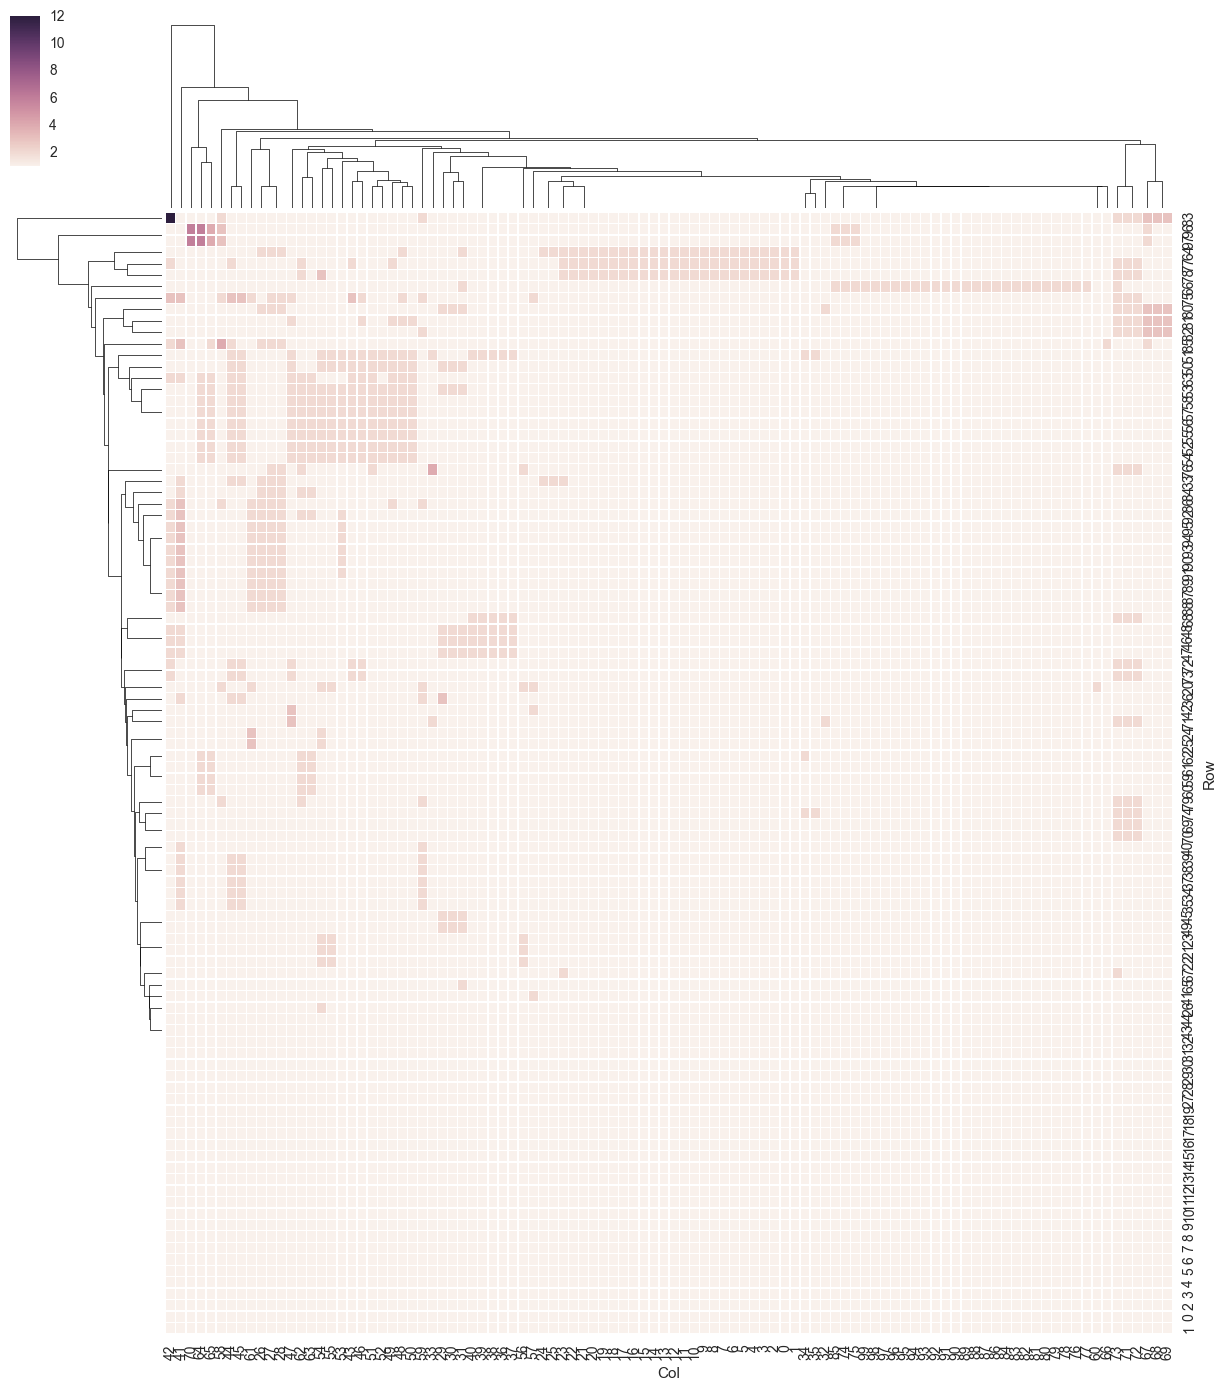

In [92]:
import seaborn as sns
color = sns.cubehelix_palette(8,start=1)
g = sns.clustermap(graph_df, figsize=(15,17), linewidth=.2)
sns.plt.show()